In [1]:
# Import library
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
import visualkeras
import seaborn as sns
import string
import keras.layers as layers
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import Resizing

2022-10-13 00:10:55.006357: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-13 00:10:55.118934: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:
2022-10-13 00:10:55.118956: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-13 00:10:55.141005: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been regi

In [2]:
# Read data
# http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/
df = pd.read_csv("Chars74K 0-9 A-Z.csv", sep="\t", index_col=0)
y_label = df["y_label"]
X = df.drop("y_label", axis=1)
y_label = np.array(y_label)
image_size = 128
X = X.values
X = X.reshape(X.shape[0], image_size, image_size)

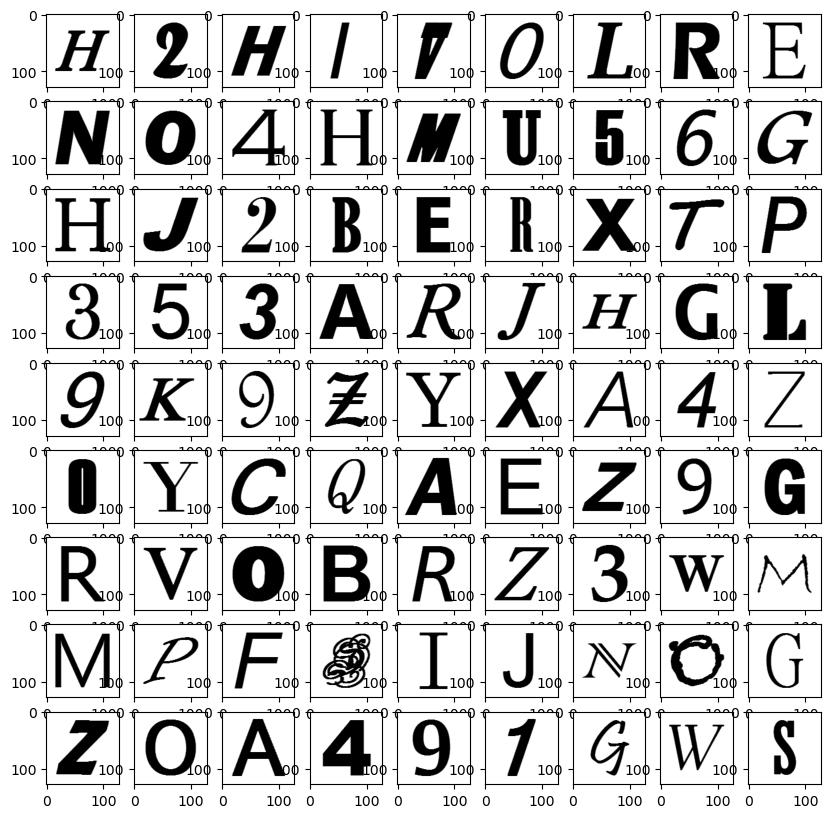

In [3]:
# Data processing
# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
(X_train, X_test, y_train, y_test) = train_test_split(X, y_label, test_size=0.2, shuffle=True)
rows, cols = 9, 9
plt.figure(figsize=(10, 10))
for i in range(rows * cols):
  plt.subplot(cols, rows, i + 1)
  plt.imshow(X_train[i], cmap = plt.get_cmap("gray"))
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
X_train = X_train.reshape(X_train.shape[0], image_size, image_size, 1)
X_test = X_test.reshape(X_test.shape[0], image_size, image_size, 1)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [4]:
# Buld up the LeNet model
# http://d2l.ai/chapter_convolutional-neural-networks/lenet.html
# https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/#
image_shape = (X_train.shape[1], X_train.shape[2], 1)
number_of_class = y_train.shape[1]
model = keras.Sequential()
model.add(Resizing(32,32, interpolation='bilinear', input_shape=image_shape))
model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=number_of_class, activation = 'softmax'))

2022-10-13 00:16:57.823490: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:
2022-10-13 00:16:57.825385: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-13 00:16:57.825870: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (65bcb65247fe): /proc/driver/nvidia/version does not exist
2022-10-13 00:16:57.845308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


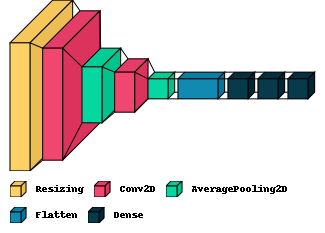

In [5]:
visualkeras.layered_view(model, legend=True)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0

In [7]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
641/641 [==============================] - 17s 24ms/step - loss: 1.3091 - accuracy: 0.6610 - val_loss: 0.5917 - val_accuracy: 0.8494
Epoch 2/100
641/641 [==============================] - 4s 6ms/step - loss: 0.4826 - accuracy: 0.8752 - val_loss: 0.4287 - val_accuracy: 0.8819
Epoch 3/100
641/641 [==============================] - 4s 6ms/step - loss: 0.3707 - accuracy: 0.8988 - val_loss: 0.3441 - val_accuracy: 0.9011
Epoch 4/100
641/641 [==============================] - 4s 6ms/step - loss: 0.3005 - accuracy: 0.9153 - val_loss: 0.3093 - val_accuracy: 0.9090
Epoch 5/100
641/641 [==============================] - 4s 7ms/step - loss: 0.2562 - accuracy: 0.9247 - val_loss: 0.2768 - val_accuracy: 0.9158
Epoch 6/100
641/641 [==============================] - 5s 8ms/step - loss: 0.2165 - accuracy: 0.9328 - val_loss: 0.2551 - val_accuracy: 0.9246
Epoch 7/100
641/641 [==============================] - 4s 6ms/step - loss: 0.1874 - accuracy: 0.9415 - val_loss: 0.2388 - val_accuracy: 0.93

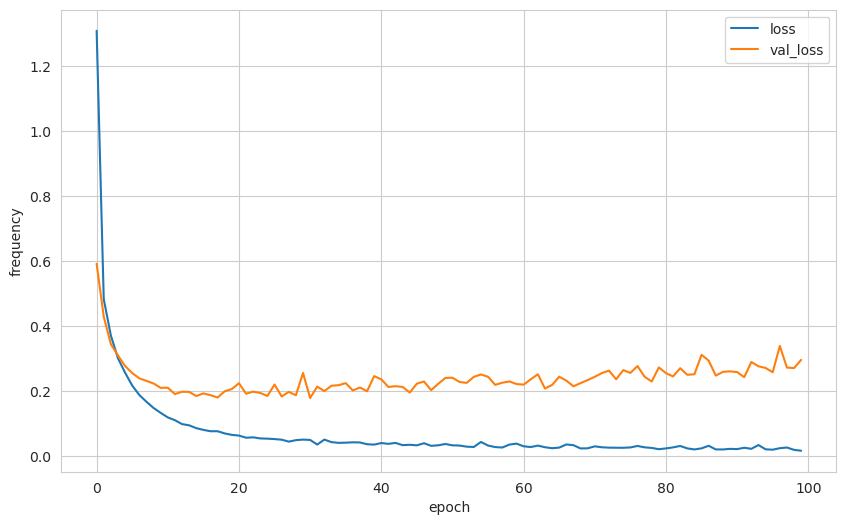

In [8]:
# Plot style and size
sns.set_style("whitegrid")
plt.subplots(figsize=(10,6))
# y axis
loss = history.history["loss"]
val_loss = history.history["val_loss"]
# x axis
epoch = list(range(len(loss)))

sns.lineplot(x = epoch, y = loss, label="loss")
sns.lineplot(x = epoch, y = val_loss, label="val_loss").set(xlabel='epoch', ylabel='frequency')

plt.show()

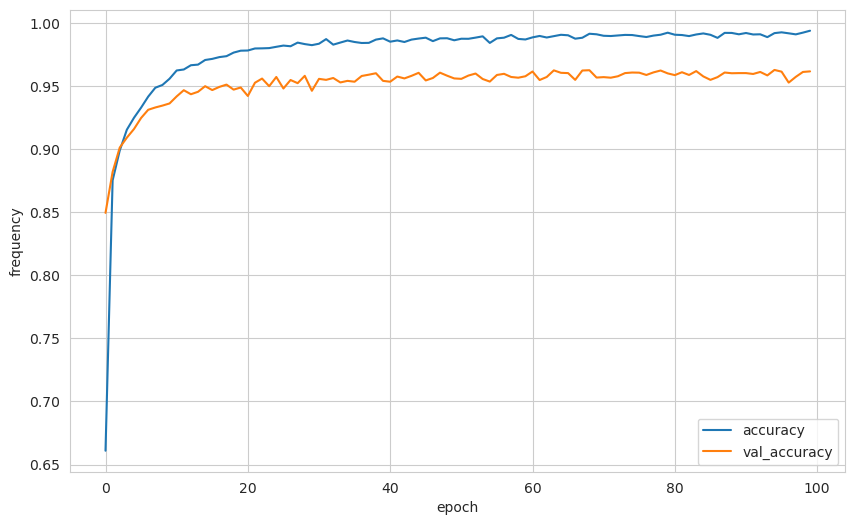

In [9]:
# Plot style and size
sns.set_style("whitegrid")
plt.subplots(figsize=(10,6))
# y axis
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
# x axis
epoch = list(range(len(accuracy)))

sns.lineplot(x = epoch, y = accuracy, label="accuracy")
sns.lineplot(x = epoch, y = val_accuracy, label="val_accuracy").set(xlabel='epoch', ylabel='frequency')

plt.show()

229/229 [==============================] - 1s 3ms/step


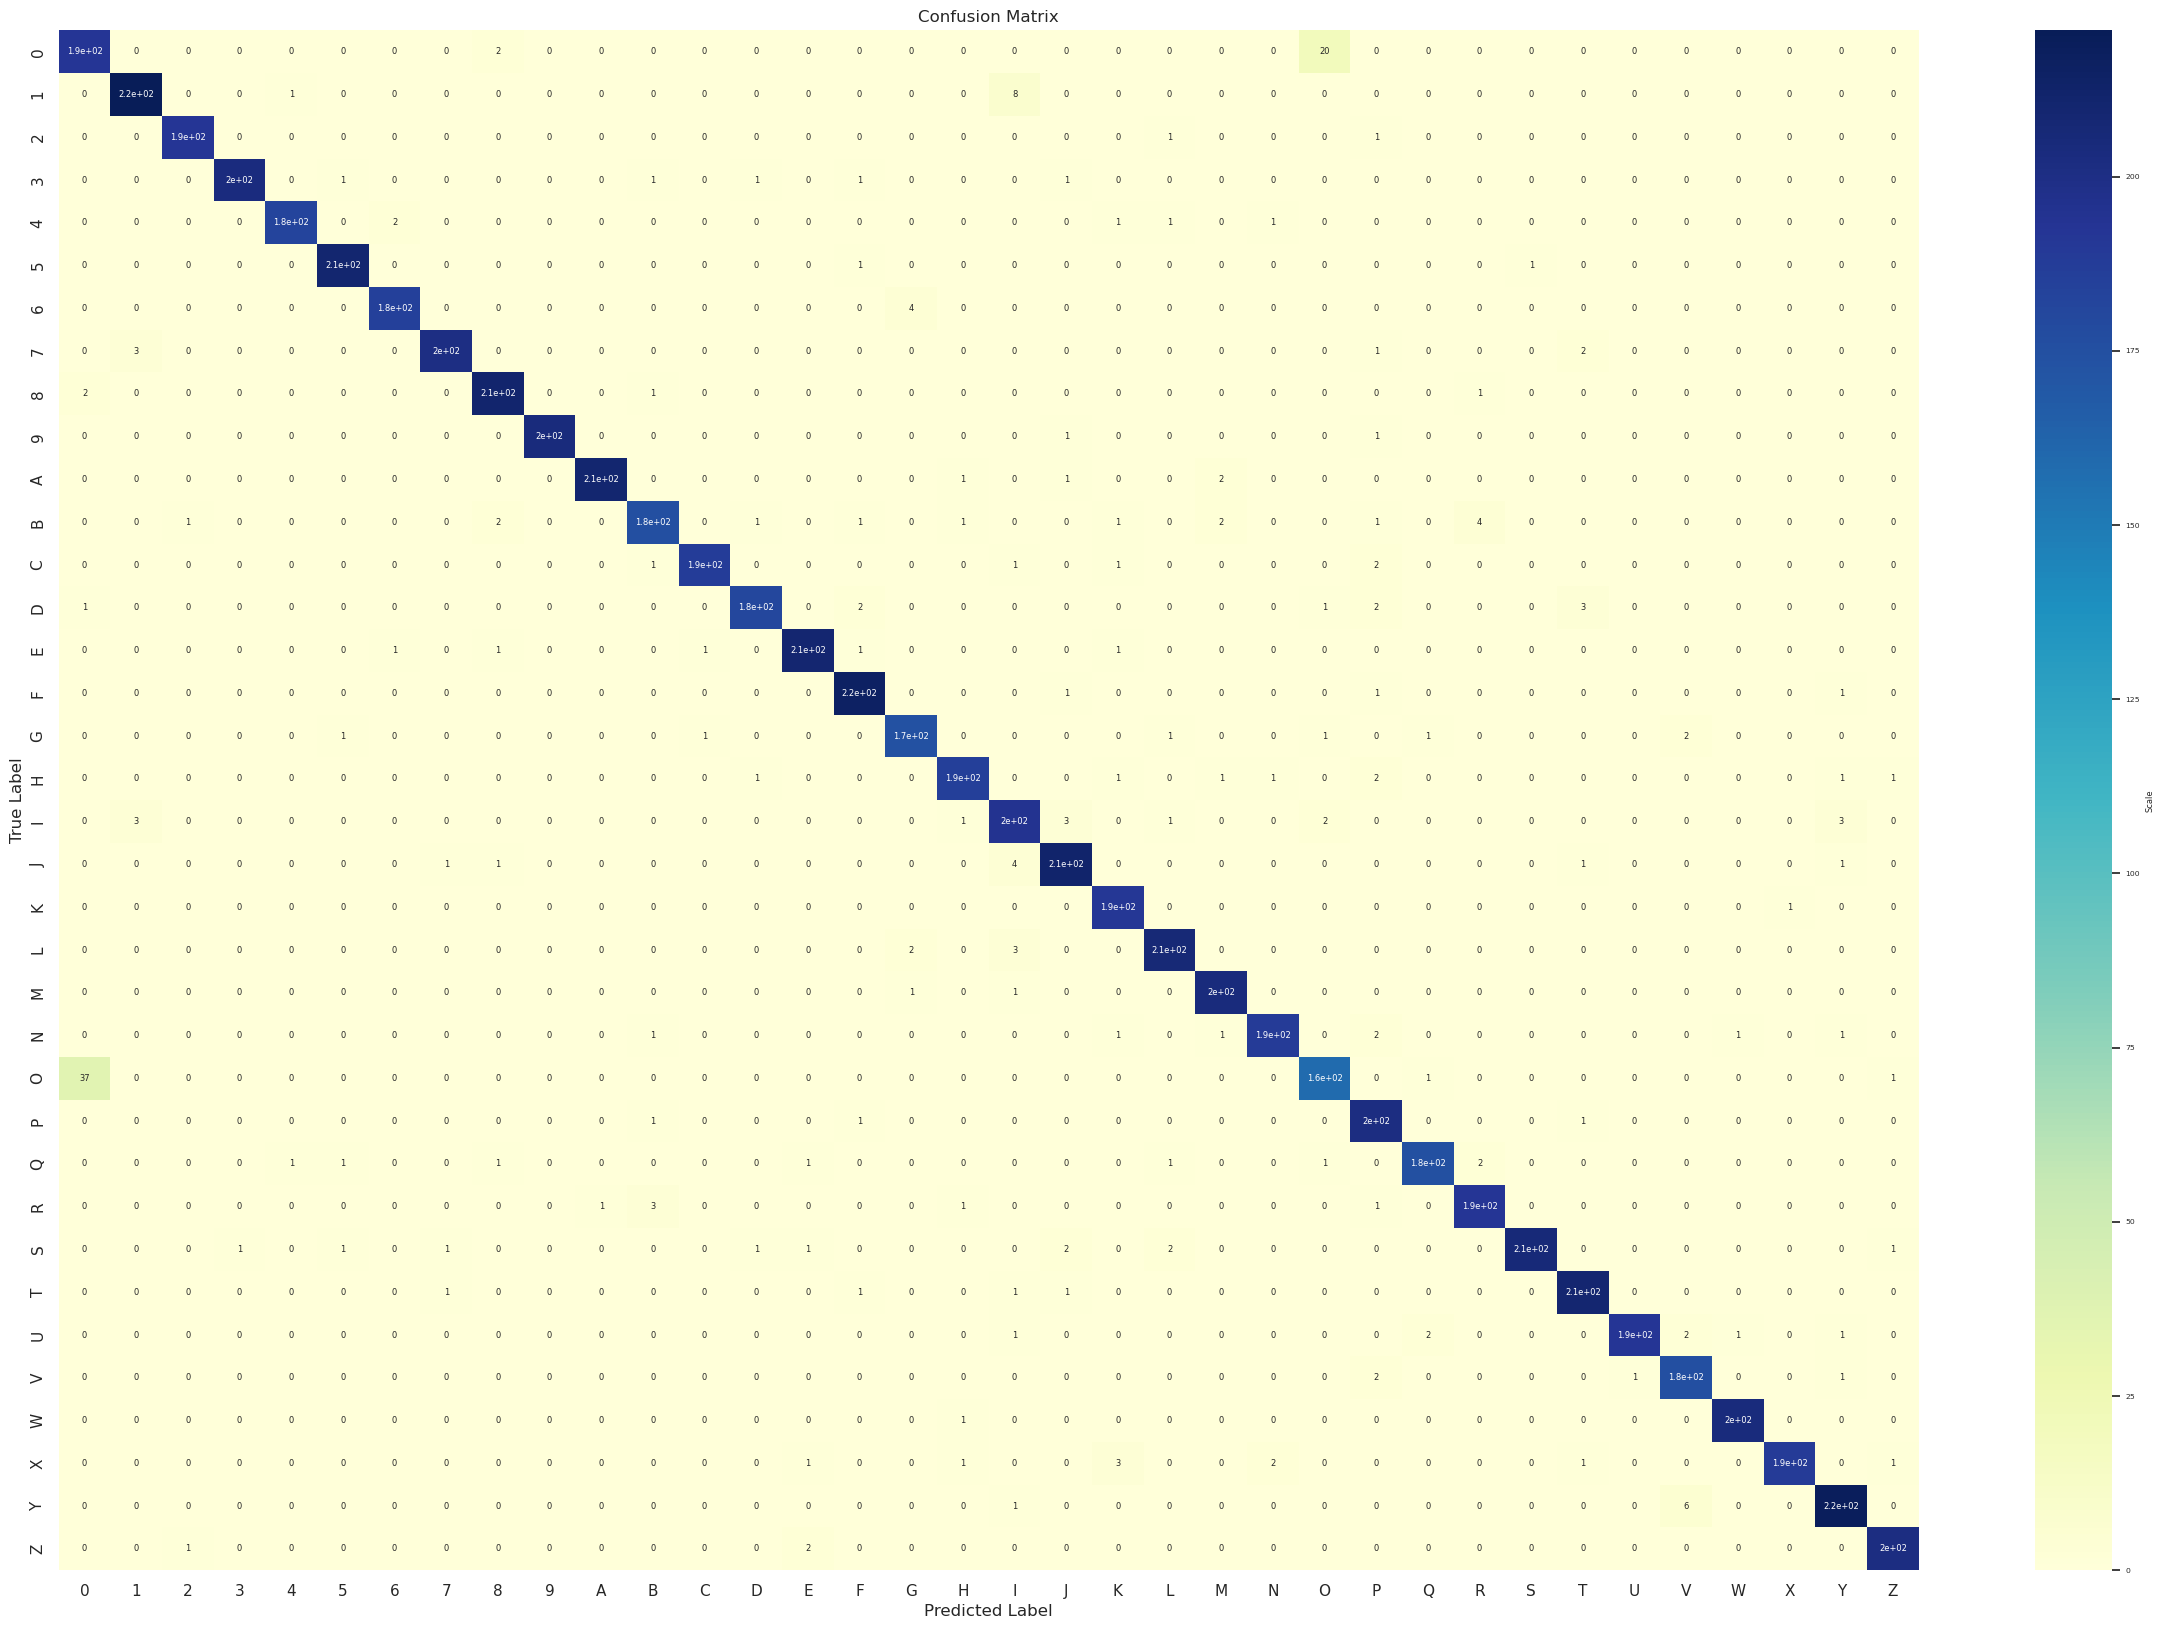

In [10]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_data = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
# Plot confusion matrix
# https://onestopdataanalysis.com/confusion-matrix-python/
def plot_confusion_matrix(data, labels):
  """Plot confusion matrix using heatmap.

  Args:
      data (list of list): List of lists with confusion matrix data.
      labels (list): Labels which will be plotted across x and y axis.

  """
  sns.set(color_codes=True)
  plt.figure(1, figsize=(30, 20))

  plt.title("Confusion Matrix")

  sns.set(font_scale=0.5)
  ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})

  ax.set_xticklabels(labels)
  ax.set_yticklabels(labels)

  ax.set(ylabel="True Label", xlabel="Predicted Label")

  plt.show()

labels = list(range(0, 10)) + list(string.ascii_uppercase)

plot_confusion_matrix(confusion_matrix_data, labels)



In [11]:
# Application
import imutils
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils import contours
import tensorflow as tf
import string

In [12]:
# https://pyimagesearch.com/2020/08/24/ocr-handwriting-recognition-with-opencv-keras-and-tensorflow/
# https://stackoverflow.com/questions/56698714/how-to-segment-characters-and-words-from-images-into-contours
# https://www.kaggle.com/code/aman10kr/offline-handwritten-text-ocr/notebook
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)
def get_word(img):
    word_image_list = []
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=5)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="top-to-bottom")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        word_image_list.append(roi)
    plt.imshow(image)
    return word_image_list

1/1 [==============================] - 0s 17ms/step
['111', 'PLATELET', '222', 'ALBUMIN']


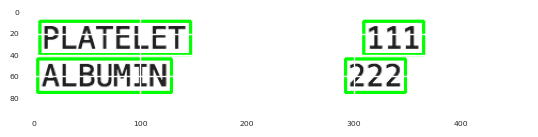

In [13]:
def image_to_text(create_image, image_size=128):
  # Reshape image
  reshape_image = cv2.resize(create_image, (image_size, image_size), interpolation=cv2.INTER_AREA)
  # Normalizing the dataset
  reshape_image = tf.keras.utils.normalize(reshape_image, axis=1)
  # Put the color channel to the dimension
  reshape_image = np.array(reshape_image).reshape(-1, image_size, image_size, 1)
  prediction = model.predict(reshape_image)
  labels = list(range(0, 10)) + list(string.ascii_uppercase)
  return labels[np.argmax(prediction[0]) - 1]
# https://stackoverflow.com/questions/36255654/how-to-add-border-around-an-image-in-opencv-python
def enlarge_image(im, bordersize = 3):
  row, col = im.shape[:2]
  bottom = im[row-2:row, 0:col]
  mean = cv2.mean(bottom)[0]

  border = cv2.copyMakeBorder(
      im,
      top=bordersize,
      bottom=bordersize,
      left=bordersize,
      right=bordersize,
      borderType=cv2.BORDER_CONSTANT,
      value=[255, 255, 255]
  )

  return border
# # https://stackoverflow.com/questions/60515216/extracting-and-saving-characters-from-an-image
# Load image, grayscale, Otsu's threshold
word_image_list = get_word("medical record.png")
context_list = []
for image in word_image_list:
  thresh = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)[1]

  # Find contours, sort from left-to-right, then crop
  cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  cnts, _ = contours.sort_contours(cnts, method="left-to-right")

  # Filter using contour area and extract ROI
  ROI_number = 0
  text_list = []
  for c in cnts:
      area = cv2.contourArea(c)
      if area > 10:
          x,y,w,h = cv2.boundingRect(c)
          ROI = image[y:y+h, x:x+w]
          large_image = enlarge_image(ROI)
          text = image_to_text(large_image)
          text_list.append(text)
          cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
          ROI_number += 1
  context_list.append("".join([str(element) for element in text_list]))
print(context_list)